# Task 3: Customer Segmentation / Clustering

## Overview

The goal of this task is to perform **customer segmentation** using clustering techniques on both **customer profile information** and **transaction data**. By grouping customers into meaningful segments based on their features (e.g., transaction behavior and profile attributes), we aim to identify patterns that can inform marketing strategies, product recommendations, and customer retention efforts.

## Steps to Approach

### 1. Data Preprocessing

- **Load and Merge Data:**
  - Load the `Customers.csv` (which contains profile information) and `Transactions.csv` (which contains transaction data).
  - Merge these datasets based on the `CustomerID` to create a comprehensive dataset with both profile and transaction information for each customer.

- **Data Cleaning:**
  - Remove any missing values or handle them appropriately (e.g., by imputation or dropping).
  - Handle outliers, if necessary, by applying suitable methods such as Z-score, IQR, etc.

- **Feature Engineering:**
  - Aggregate the transaction data to generate features such as:
    - Total spend per customer.
    - Frequency of purchases.
    - Recency of the last purchase.
  - Merge these features with the customer profile data.

### 2. Clustering Algorithm

- **Choosing the Clustering Algorithm:**
  - Use **K-Means** clustering as the primary method since it is widely used and straightforward. 
  - Optionally, experiment with other clustering techniques such as **DBSCAN** or **Agglomerative Clustering** to see if they yield better results.

- **Setting the Number of Clusters:**
  - Set the number of clusters to vary between 2 and 10. 
  - Use clustering performance metrics (such as the **DB Index**) to determine the optimal number of clusters.

### 3. Clustering Evaluation Metrics

- **Davies-Bouldin Index (DB Index):**
  - This index measures the average similarity ratio of each cluster with the cluster that is most similar to it. 
  - A lower DB Index indicates better clustering quality (clusters are more distinct from each other).

- **Other Metrics:**
  - **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters.
  - **Inertia** (for K-Means): Measures the sum of squared distances of samples to their closest cluster center.

### 4. Visualizing Clusters

- Use dimensionality reduction techniques (such as **PCA** or **t-SNE**) to reduce the high-dimensional feature space to 2D for visualization.
- Plot the clusters using different colors to easily differentiate between them.

### 5. Interpretation

- **Cluster Insights:**
  - Interpret and provide insights into each cluster.
  - Identify characteristics that distinguish each cluster in terms of behavior and demographics.
  
- **Cluster Profiles:**
  - Evaluate the profiles of each cluster to understand:
    - Which segments have the highest transaction frequency?
    - Which segments have the highest spending or most recent activity?

## Deliverables

1. **A report** on the clustering results, including:
   - The number of clusters formed.
   - The **DB Index** value.
   - Other relevant clustering metrics (e.g., Silhouette Score, Inertia).
  
2. **A Jupyter Notebook/Python script** containing the clustering code and analysis.

## Evaluation Criteria

- **Clustering Logic and Metrics:** How well the clustering algorithm performs and how relevant the metrics are.
- **Visual Representation of Clusters:** The clarity and effectiveness of visualizations in depicting the clusters.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [2]:
customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions.csv")

In [3]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [4]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [5]:
transactions.columns 

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [6]:
# Group by CustomerID and aggregate transaction features
transactions_features = transactions.groupby("CustomerID").agg(
    TotalSpend = ("TotalValue", "sum"),
    TransactionFrequency = ("TransactionID", "count"),
    AverageTransactionValue = ("TotalValue", "mean"),
).reset_index()

transactions_features

,CustomerID,TotalSpend,TransactionFrequency,AverageTransactionValue
0,C0001,3354.52,5,670.904000
1,C0002,1862.74,4,465.685000
2,C0003,2725.38,4,681.345000
3,C0004,5354.88,8,669.360000
4,C0005,2034.24,3,678.080000
...,...,...,...,...
194,C0196,4982.88,4,1245.720000
195,C0197,1928.65,3,642.883333
196,C0198,931.83,2,465.915000
197,C0199,1979.28,4,494.820000


In [7]:
# Merging customer profile information with transaction features
customer_features = pd.merge(customers, transactions_features, on="CustomerID", how="inner")
customer_features

,CustomerID,CustomerName,Region,SignupDate,TotalSpend,TransactionFrequency,AverageTransactionValue
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5,670.904000
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4,465.685000
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4,681.345000
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8,669.360000
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3,678.080000
...,...,...,...,...,...,...,...
194,C0196,Laura Watts,Europe,2022-06-07,4982.88,4,1245.720000
195,C0197,Christina Harvey,Europe,2023-03-21,1928.65,3,642.883333
196,C0198,Rebecca Ray,Europe,2022-02-27,931.83,2,465.915000
197,C0199,Andrea Jenkins,Europe,2022-12-03,1979.28,4,494.820000


In [8]:
# Select numeric features
numeric_features = customer_features.select_dtypes(include=[np.number])
numeric_features


,TotalSpend,TransactionFrequency,AverageTransactionValue
0,3354.52,5,670.904000
1,1862.74,4,465.685000
2,2725.38,4,681.345000
3,5354.88,8,669.360000
4,2034.24,3,678.080000
...,...,...,...
194,4982.88,4,1245.720000
195,1928.65,3,642.883333
196,931.83,2,465.915000
197,1979.28,4,494.820000


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [10]:
# Apply StandardScaler to scale the features
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(numeric_features)
customer_features_scaled

array([[-6.17014282e-02, -1.14581896e-02, -7.02634115e-02],
       [-8.77743532e-01, -4.67494136e-01, -9.34932971e-01],
       [-4.05857221e-01, -4.67494136e-01, -2.62713110e-02],
       [ 1.03254704e+00,  1.35664965e+00, -7.67688998e-02],
       [-7.83928612e-01, -9.23530083e-01, -4.00280592e-02],
       [ 4.15879421e-01, -4.67494136e-01,  1.55606020e+00],
       [-4.85482293e-01, -9.23530083e-01,  7.26220709e-01],
       [ 4.39970436e-01,  2.26872154e+00, -1.09724996e+00],
       [-1.40630171e+00, -9.23530083e-01, -1.63794564e+00],
       [-9.57166204e-01, -4.67494136e-01, -1.08786883e+00],
       [ 1.43695808e-01, -1.14581896e-02,  2.46146011e-01],
       [ 9.64923716e-01,  9.00613703e-01,  2.51719736e-01],
       [ 1.38575064e+00,  9.00613703e-01,  7.14772302e-01],
       [-1.72239508e+00, -1.83560198e+00, -1.55440798e+00],
       [-1.26353893e+00, -1.37956603e+00, -4.58587130e-01],
       [ 2.22697270e-01, -1.14581896e-02,  3.67845832e-01],
       [ 7.03751732e-01,  1.35664965e+00

In [11]:
# Step 4: Choose clustering algorithm (K-Means in this case)
# Let's try different values for the number of clusters (between 2 and 10)

# Clustering analysis
cluster_range = range(2, 11)
db_index_scores = []
silhouette_scores = []
inertia_values = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_features_scaled)
    
    # Evaluation metrics
    db_index_scores.append(davies_bouldin_score(customer_features_scaled, labels))
    silhouette_scores.append(silhouette_score(customer_features_scaled, labels))
    inertia_values.append(kmeans.inertia_)

Text(0, 0.5, 'Davies-Bouldin Index')

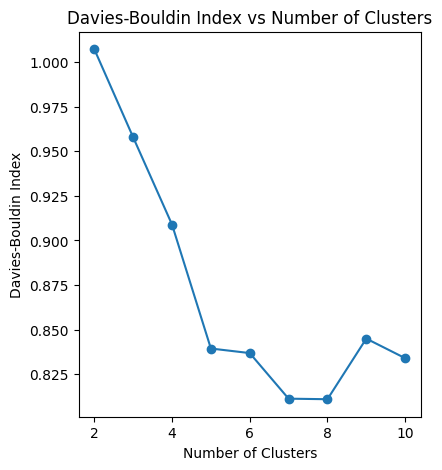

In [12]:
# Step 5: Visualize DB Index, Silhouette Score, and Inertia to decide optimal k

# Plot evaluation metrics
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(cluster_range, db_index_scores, marker='o')
plt.title("Davies-Bouldin Index vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")

Text(0, 0.5, 'Silhouette Score')

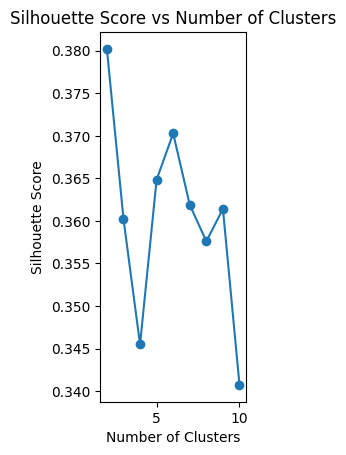

In [13]:
# Plot Silhouette Score
plt.subplot(1, 3, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

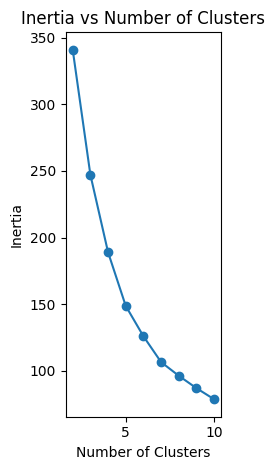

In [14]:
plt.subplot(1, 3, 3)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Inertia vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.tight_layout()
plt.show()

In [15]:
#Step 6: Choose the optimal number of clusters (based on the plots)
optimal_clusters = 4 # Example: Choose 4 clusters based on the evaluation metrics

In [16]:
# Step 7: Perform K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features_scaled_kmeans = kmeans.fit_predict(customer_features_scaled)


In [17]:
customer_features

,CustomerID,CustomerName,Region,SignupDate,TotalSpend,TransactionFrequency,AverageTransactionValue
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5,670.904000
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4,465.685000
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4,681.345000
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8,669.360000
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3,678.080000
...,...,...,...,...,...,...,...
194,C0196,Laura Watts,Europe,2022-06-07,4982.88,4,1245.720000
195,C0197,Christina Harvey,Europe,2023-03-21,1928.65,3,642.883333
196,C0198,Rebecca Ray,Europe,2022-02-27,931.83,2,465.915000
197,C0199,Andrea Jenkins,Europe,2022-12-03,1979.28,4,494.820000


In [18]:
# Step 8: Visualize the clusters using PCA for dimensionality reduction
# PCA for dimensionality reduction
pca = PCA(n_components=2)
customer_features_pca = pca.fit_transform(customer_features_scaled)


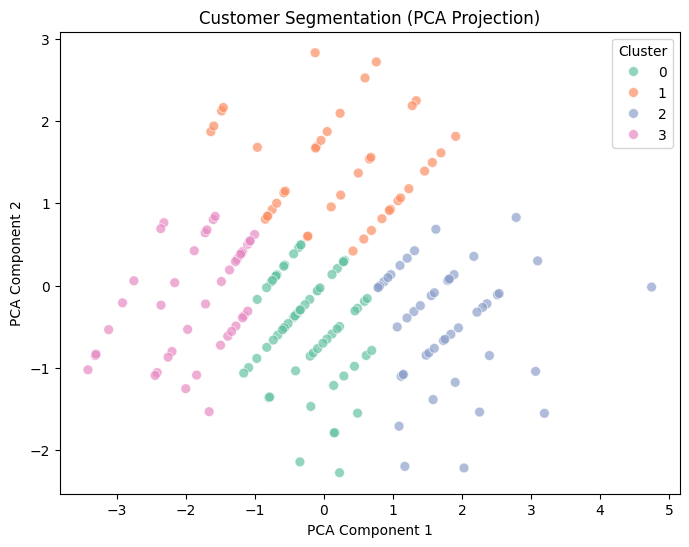

In [19]:
# Visualize clusters with PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=customer_features_pca[:, 0], y=customer_features_pca[:, 1],
    hue=customer_features_scaled_kmeans, palette="Set2",
    s=50, alpha=0.7
)
plt.title("Customer Segmentation (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


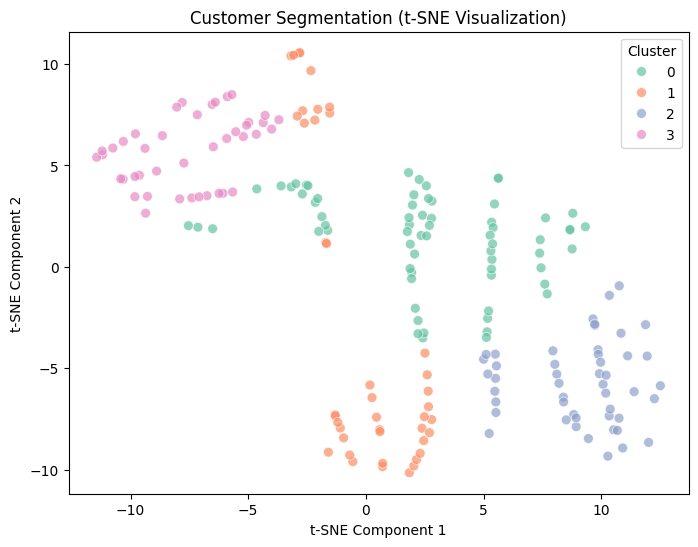

In [20]:
from sklearn.manifold import TSNE

# Visualize clusters with t-SNE
tsne = TSNE(n_components=2, random_state=42)
customer_features_tsne = tsne.fit_transform(customer_features_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=customer_features_tsne[:, 0], y=customer_features_tsne[:, 1],
    hue=customer_features_scaled_kmeans, palette="Set2",
    s=50, alpha=0.7
)
plt.title("Customer Segmentation (t-SNE Visualization)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()

In [21]:
# Step 9: Cluster interpretation
# Optimal number of clusters (example: 4 clusters based on evaluation)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features_scaled)

# Ensure the 'Cluster' column exists
if 'Cluster' not in customer_features.columns:
    print("Error: 'Cluster' column is missing in the DataFrame.")


In [22]:
# Step 10: Save the final clustering results
customer_features.to_csv("Customer_Segmentation_Results.csv", index=False)

In [23]:
# Optional: Evaluate cluster quality using Davies-Bouldin Index and Silhouette Score
db_index = davies_bouldin_score(customer_features_scaled, customer_features['Cluster'])
silhouette = silhouette_score(customer_features_scaled, customer_features['Cluster'])

In [24]:
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette}')

Davies-Bouldin Index: 0.9088862131710538
Silhouette Score: 0.3454749066816505


In [25]:
customer_features['Cluster'].value_counts()

Cluster
0    67
2    48
3    42
1    42
Name: count, dtype: int64

In [26]:
customer_features.head()

,CustomerID,CustomerName,Region,SignupDate,TotalSpend,TransactionFrequency,AverageTransactionValue,Cluster
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5,670.904,0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4,465.685,3
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4,681.345,0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8,669.360,2
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3,678.080,3


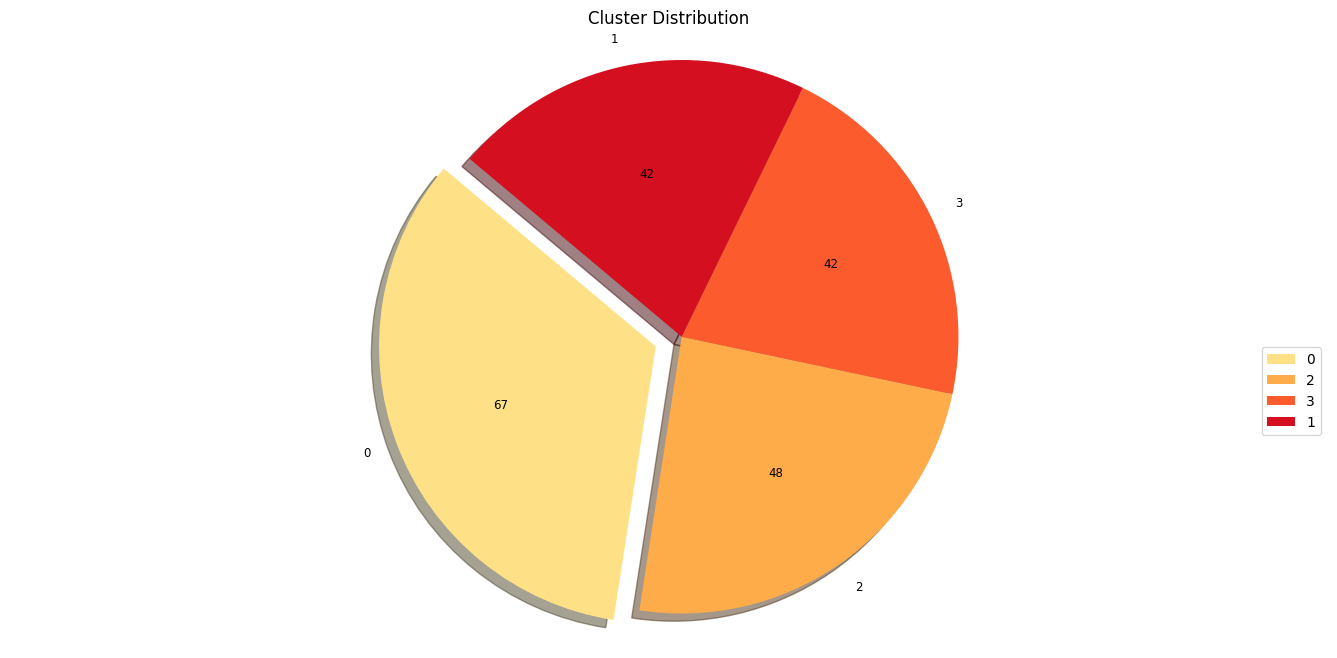

In [49]:
cluster_counts = customer_features["Cluster"].value_counts()

colors = sns.color_palette("YlOrRd", len(cluster_counts))

explode = [0.1 if i == max(cluster_counts) else 0 for i in cluster_counts]

# Plot the pie chart
plt.figure(figsize=(17, 8))
patches, texts, autotexts = plt.pie(
    cluster_counts, 
    labels=cluster_counts.index, 
    autopct=lambda p: f'{int(p * sum(cluster_counts) / 100)}', 
    colors=colors, 
    explode=explode, 
    shadow=True, 
    startangle=140, 
    labeldistance=1.1
)
for text in texts + autotexts:
    text.set_fontsize(8.5)

plt.legend(patches, cluster_counts.index, loc='best', bbox_to_anchor=(1, 0.5))

plt.title('Cluster Distribution', loc="center")

plt.axis('equal')

plt.show()


In [42]:
customer_features.Cluster.value_counts()

Cluster
0    67
2    48
3    42
1    42
Name: count, dtype: int64